In [492]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

### Accepted

In [493]:
# load
df_accepted = pd.read_csv("data/df_accepted_50_all_keyword_depression.csv")
df_accepted["Accepted"] = pd.to_datetime(df_accepted["Accepted"])
df_accepted.head()

,Accepted
0,2021-03-03
1,2022-08-29
2,2022-12-09
3,2022-12-07
4,2022-12-07


#### Extract columns

In [494]:
# extract columns
df_accepted["year"] = df_accepted["Accepted"].dt.year
df_accepted["month"] = df_accepted["Accepted"].dt.month
df_accepted["day"] = df_accepted["Accepted"].dt.day
df_accepted.head()

,Accepted,year,month,day
0,2021-03-03,2021,3,3
1,2022-08-29,2022,8,29
2,2022-12-09,2022,12,9
3,2022-12-07,2022,12,7
4,2022-12-07,2022,12,7


#### Count per month

In [495]:
# total articles received per month per year
df_accepted_long = df_accepted.groupby(["year", "month"])["month"].count()

# turn multi index to columns
df_accepted_per_month = df_accepted_long.index.to_frame(name=['year', 'month'], index=False)
df_accepted_per_month["total"] = df_accepted_long.values
df_accepted_per_month = df_accepted_per_month.round(1)
df_accepted_per_month.head()

,year,month,total
0,2021,3,40
1,2021,4,40
2,2021,6,20
3,2021,8,80
4,2021,9,300


In [496]:
# check
len(df_accepted[(df_accepted.year == 2021) & (df_accepted.month == 3)])

40

In [497]:
# total articles received per month per separate year
df_accepted_long = pd.DataFrame(df_accepted_long)
df_accepted_long

month
year month       
2021 3         40
     4         40
     6         20
     8         80
     9        300
     10       180
     11        80
     12        40
2022 1        280
     2        240
     3        400
     4        200
     5        500
     6        400
     7        220
     8        680
     9        560
     10       800
     11      1240
     12      2000
2023 1       1700
     2       4760
     3       4800

In [498]:
df_accepted_long.index = df_accepted_long.index.set_names(['index1', 'index2'])

In [499]:
len(df_accepted[(df_accepted.month == 2)]), len(df_accepted[(df_accepted.month == 7)])

(5000, 220)

In [500]:
len(df_accepted[(df_accepted.year == 2019)])

0

### Received

#### Extract columns

In [501]:
# load
df_received = pd.read_csv("data/df_received_50_all_keyword_depression.csv")
df_received["Received"] = pd.to_datetime(df_received["Received"])

# extract columns
df_received["year"] = df_received["Received"].dt.year
df_received["month"] = df_received["Received"].dt.month
df_received["day"] = df_received["Received"].dt.day

# # nr per day
# df_received_count = pd.DataFrame(df_received.groupby(["month", "year", "day"])["month"].count())

# # change multiindex and column names
# df_received_count = df_received_count.rename(columns={'month': 'total'})
# df_received_count.index = df_received_count.index.set_names(['index_month', 'year', 'day'])
df_received.head()

,Received,year,month,day
0,2022-11-19,2022,11,19
1,2022-10-07,2022,10,7
2,2022-12-03,2022,12,3
3,2022-04-16,2022,4,16
4,2022-04-12,2022,4,12


#### Count per month

In [502]:
# total articles received per month per year
df_received_long = df_received.groupby(["year", "month"])["month"].count()

# turn multi index to columns
df_received_per_month = df_received_long.index.to_frame(name=['year', 'month'], index=False)
df_received_per_month["total"] = df_received_long.values
df_received_per_month = df_received_per_month.round(1)
df_received_per_month.head()

,year,month,total
0,2019,2,20
1,2019,4,20
2,2020,2,20
3,2020,5,20
4,2020,7,20


In [503]:
# sanity check
len(df_received[(df_received.year == 2019) & (df_received.month == 4)])

20

## Plotting

### Total per month per year

In [504]:
# plotting received
fig = px.line(df_received_per_month, x="month", y="total", color="year", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified", title="Total number of received articles per month")
fig.show()

Text(0.5, 1.0, 'Total received articles per month for multiple years')

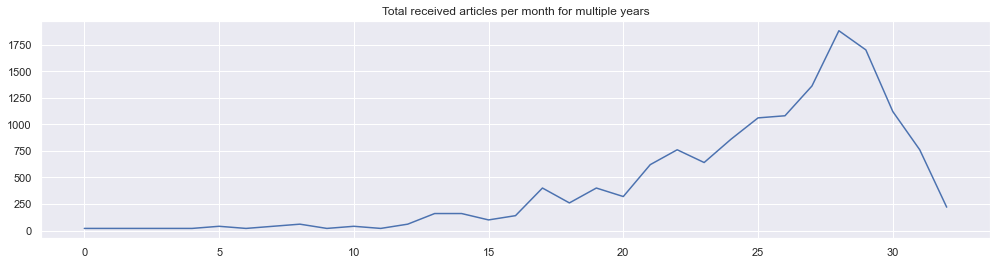

In [505]:
plt.figure(figsize=(17,4))
df_received_per_month.total.plot()
plt.title("Total received articles per month for multiple years")

In [523]:
# plotting accepted
fig = px.line(df_accepted_per_month, x="month", y="total", color="year", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified", title="Total number of accepted articles per month")
fig.show()

Text(0.5, 1.0, 'Total accepted articles per month for multiple years')

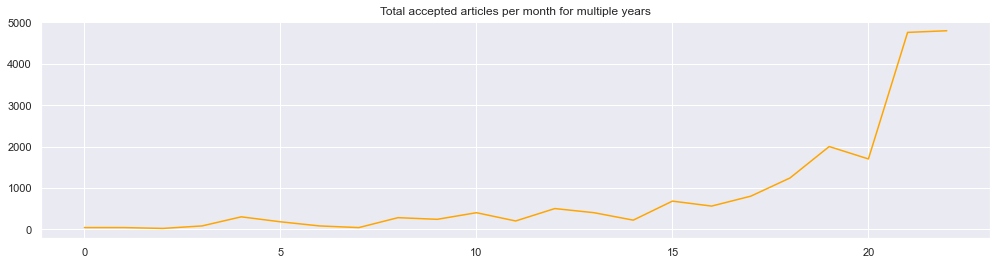

In [507]:
plt.figure(figsize=(17,4))
df_accepted_per_month.total.plot(color="orange")
plt.title("Total accepted articles per month for multiple years")

Text(0.5, 1.0, 'Total received and accepted articles per month for multiple years')

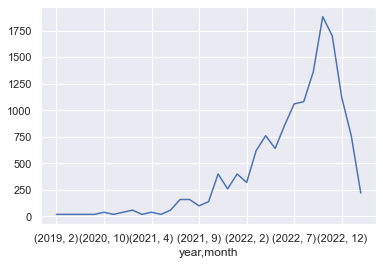

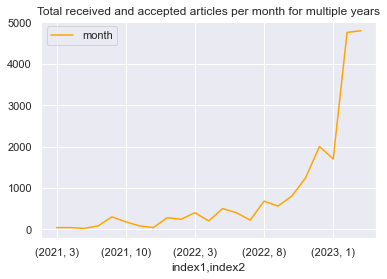

In [521]:
df_received_long.plot()
df_accepted_long.plot(color="orange")
plt.title("Total received and accepted articles per month for multiple years")

### Total per month

Text(0, 0.5, 'Count')

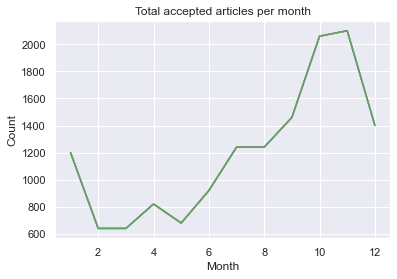

In [509]:
plt.plot(df_received.groupby(["month"]).count())
plt.title("Total accepted articles per month")
plt.xlabel("Month")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

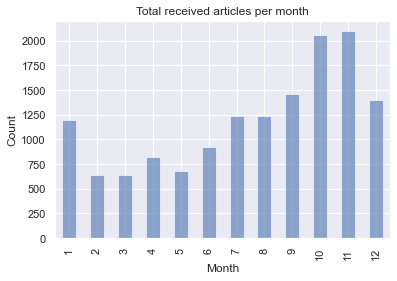

In [510]:
# plotting received
df_received.groupby(df_received.month)["month"].count().plot(kind="bar", alpha=0.6, legend=False)
plt.title("Total received articles per month")
plt.xlabel("Month")
plt.ylabel("Count")
# smooth_plot(df_received.groupby(df_received["Received"].dt.month).count(), "lightblue", "Received")

Text(0, 0.5, 'Count')

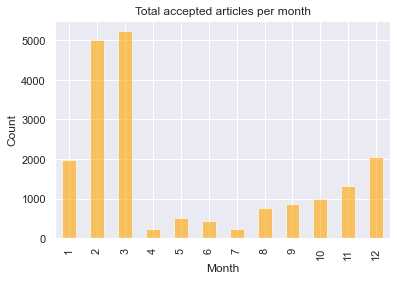

In [511]:
# plotting accepted
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="bar", alpha=0.6, color="orange", legend=False)
plt.title("Total accepted articles per month")
plt.xlabel("Month")
plt.ylabel("Count")
# smooth_plot(df_accepted.groupby(df_accepted["Accepted"].dt.month).count(), "orange", "Accepted")

### Comparison

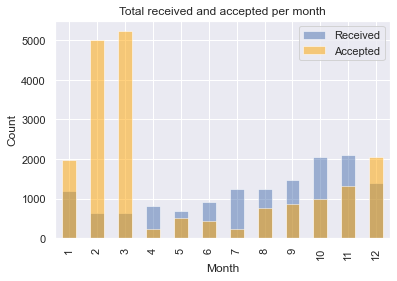

In [512]:
# compare both
ax = df_received.groupby(df_received.month)["month"].count().plot(kind="bar", alpha=0.5, label="Received")
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="bar", color="orange", alpha=0.5, label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.title("Total received and accepted per month");

In [513]:
df_received = df_received[df_received.year.isin([2021, 2022])]
df_accepted = df_accepted[df_accepted.year.isin([2021, 2022])]

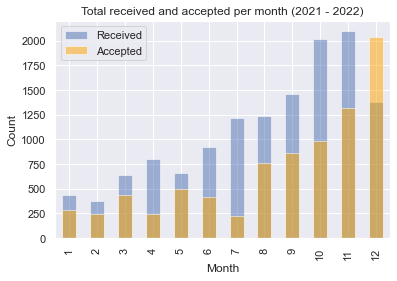

In [514]:
# compare both
ax = df_received.groupby(df_received.month)["month"].count().plot(kind="bar", alpha=0.5, label="Received")
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="bar", color="orange", alpha=0.5, label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.title("Total received and accepted per month (2021 - 2022)");

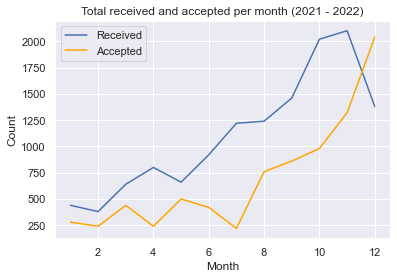

In [515]:
ax = df_received.groupby(df_received.month)["month"].count().plot(kind="line", label="Received")
df_accepted.groupby(df_accepted.month)["month"].count().plot(kind="line", color="orange", label="Accepted", ax=ax)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.title("Total received and accepted per month (2021 - 2022)");

### Smooth curve

In [516]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

def smooth_plot(data, color, label):
    
    # create data
    x = np.arange(0, 12, 1)
    x_ticks = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    y = np.array(data)

    # define x as 200 equally spaced values between the min and max of original x 
    xnew = np.linspace(x.min(), x.max(), 200) 

    # define spline with degree k=7
    spl = make_interp_spline(x, y, k=7)
    y_smooth = spl(xnew)

    # create smooth line chart 
    plt.plot(xnew, y_smooth, color=color, label=label)

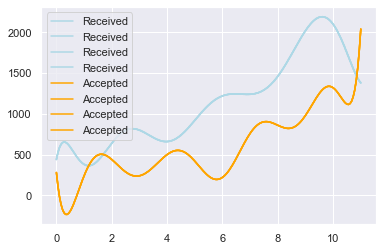

In [517]:
smooth_plot(df_received.groupby(df_received["Received"].dt.month).count(), "lightblue", "Received")
smooth_plot(df_accepted.groupby(df_accepted["Accepted"].dt.month).count(), "orange", "Accepted")
plt.legend()